In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_rows', None)
import re
from pathlib import Path
import plotly.express as px
from course_id_mapping import course_ids_dictionary

In [3]:
all_cleaned_path = Path("author_mentions")

# Initialize an empty list to store the data
data = []

# Iterate over each file in the folder and its subdirectories
for file_path in all_cleaned_path.glob("**/*.json"):
    if file_path.is_file():

        # Read the JSON file into a DataFrame
        df = pd.read_json(file_path)
        print(f"Successfully read in {file_path}.")
        course_id = file_path.stem[:7]
        
        # Add a column for course_id
        df['canvas_course_id'] = course_id

        # Append the DataFrame to the data list
        data.append(df)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(data, ignore_index=True)

# Print the final DataFrame
print(df.columns)

Successfully read in author_mentions\main_posts\1149116_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1150006_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1154406_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1155902_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1158756_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1160142_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1163902_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1166460_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1171836_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1174984_author_mentions_main_posts.json.
Successfully read in author_mentions\reply_posts\1149116_author_mentions_reply_posts.json.
Successfully read i

In [5]:
df.drop(columns=['updated_at', 'rating_count', 'rating_sum', 'read_state', 'forced_read_state', 'editor_id', 'attachment', 'attachments', 'user'], inplace=True)

In [6]:
df.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,"[3, 4]",1149116
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,"[2, 2]",1149116
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,"[1, 5, 5, 5, 5]",1149116
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...",3526380,[],1149116
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...",3526380,[],1149116


In [9]:
df['canvas_course_id'] = df['canvas_course_id'].astype(int)
df['semester_year'] = df['canvas_course_id'].map(course_ids_dictionary)

df['author_mentions'] = df['author_mentions'].apply(set)
df.head(15)

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,"{3, 4}",1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,{2},1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,"{1, 5}",1149116,fall_2019
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...",3526380,{},1149116,fall_2019
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...",3526380,{},1149116,fall_2019
5,18565148,3885800,NaN,2019-08-26 04:28:56+00:00,Jazmyn Warner,"<p>""You can't always get what you want, but yo...",3526380,{2},1149116,fall_2019
6,18565142,3878152,NaN,2019-08-26 04:25:54+00:00,Martina Kotrba,"<p>Out of all the text, the ""Supernatural Horr...",3526380,"{1, 4}",1149116,fall_2019
7,18564628,3889400,NaN,2019-08-26 02:46:25+00:00,Tiffaney Miller Mack,What stood out to me was reading about fear an...,3526380,{2},1149116,fall_2019
8,18564440,3885848,NaN,2019-08-26 02:26:10+00:00,Arely Sanchez,<p>What stood out to me the most would be Sigm...,3526380,{5},1149116,fall_2019
9,18564190,3815649,NaN,2019-08-26 01:58:06+00:00,Olivia Hollander,<p>I didn't know what to expect from weird fic...,3526380,"{1, 2}",1149116,fall_2019


In [10]:
df_exploded = df.explode('author_mentions')
df_exploded.head(15)

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,3,1149116,fall_2019
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,4,1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,2,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,1,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...",3526380,NaN,1149116,fall_2019
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...",3526380,NaN,1149116,fall_2019
5,18565148,3885800,NaN,2019-08-26 04:28:56+00:00,Jazmyn Warner,"<p>""You can't always get what you want, but yo...",3526380,2,1149116,fall_2019
6,18565142,3878152,NaN,2019-08-26 04:25:54+00:00,Martina Kotrba,"<p>Out of all the text, the ""Supernatural Horr...",3526380,1,1149116,fall_2019
6,18565142,3878152,NaN,2019-08-26 04:25:54+00:00,Martina Kotrba,"<p>Out of all the text, the ""Supernatural Horr...",3526380,4,1149116,fall_2019


In [30]:
grouped = df_exploded.groupby(['semester_year', 'author_mentions']).size()

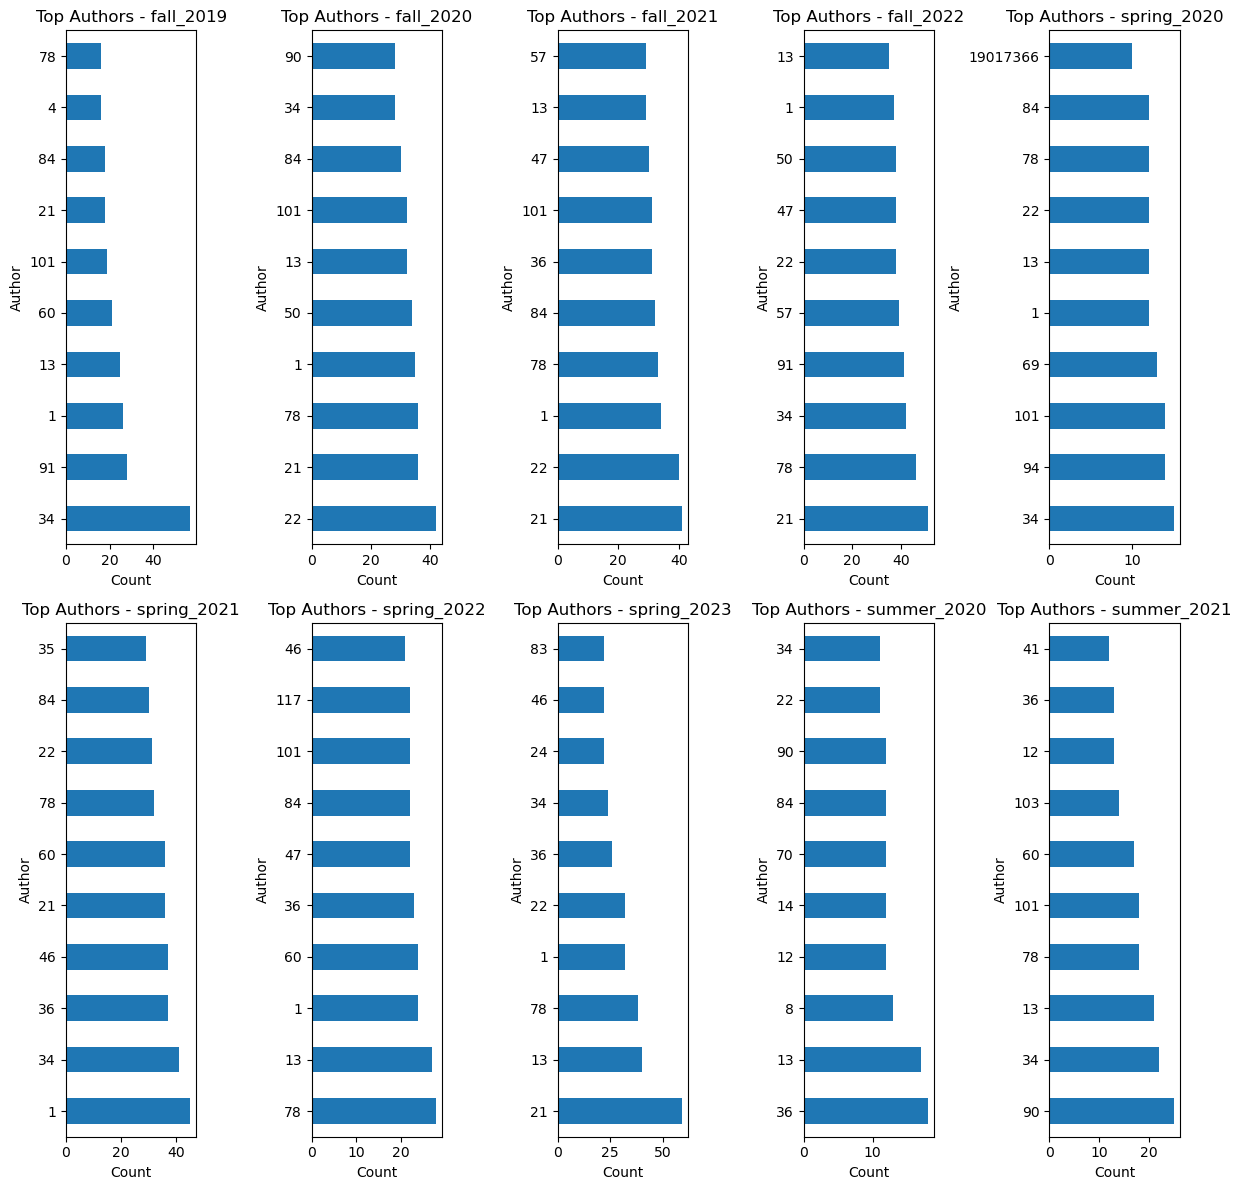

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df_exploded'
grouped = df_exploded.groupby(['semester_year', 'author_mentions']).size()

# Get unique semester_years
semester_years = grouped.index.get_level_values('semester_year').unique()

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 5

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over each semester_year
for i, semester_year in enumerate(semester_years):
    # Select the top_ten group for the current semester_year
    top_ten = grouped.loc[semester_year].nlargest(10)
    
    # Calculate the subplot position
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Plot the bar chart in the corresponding subplot
    ax = axs[row_idx, col_idx]
    ax.set_title(f'Top Authors - {semester_year}')
    top_ten.plot(kind='barh', ax=ax)
    ax.set_xlabel('Count')
    ax.set_ylabel('Author')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
# Iterate over each semester_year
for semester_year, group in grouped.groupby(level='semester_year'):
    print("Semester Year:", semester_year)
    top_five = group.nlargest(5)
    print(top_five)

Semester Year: fall_2019
semester_year  author_mentions
fall_2019      34                 57
               91                 28
               1                  26
               13                 25
               60                 21
dtype: int64
Semester Year: fall_2020
semester_year  author_mentions
fall_2020      22                 42
               21                 36
               78                 36
               1                  35
               50                 34
dtype: int64
Semester Year: fall_2021
semester_year  author_mentions
fall_2021      21                 41
               22                 40
               1                  34
               78                 33
               84                 32
dtype: int64
Semester Year: fall_2022
semester_year  author_mentions
fall_2022      21                 51
               78                 46
               34                 42
               91                 41
               57                 

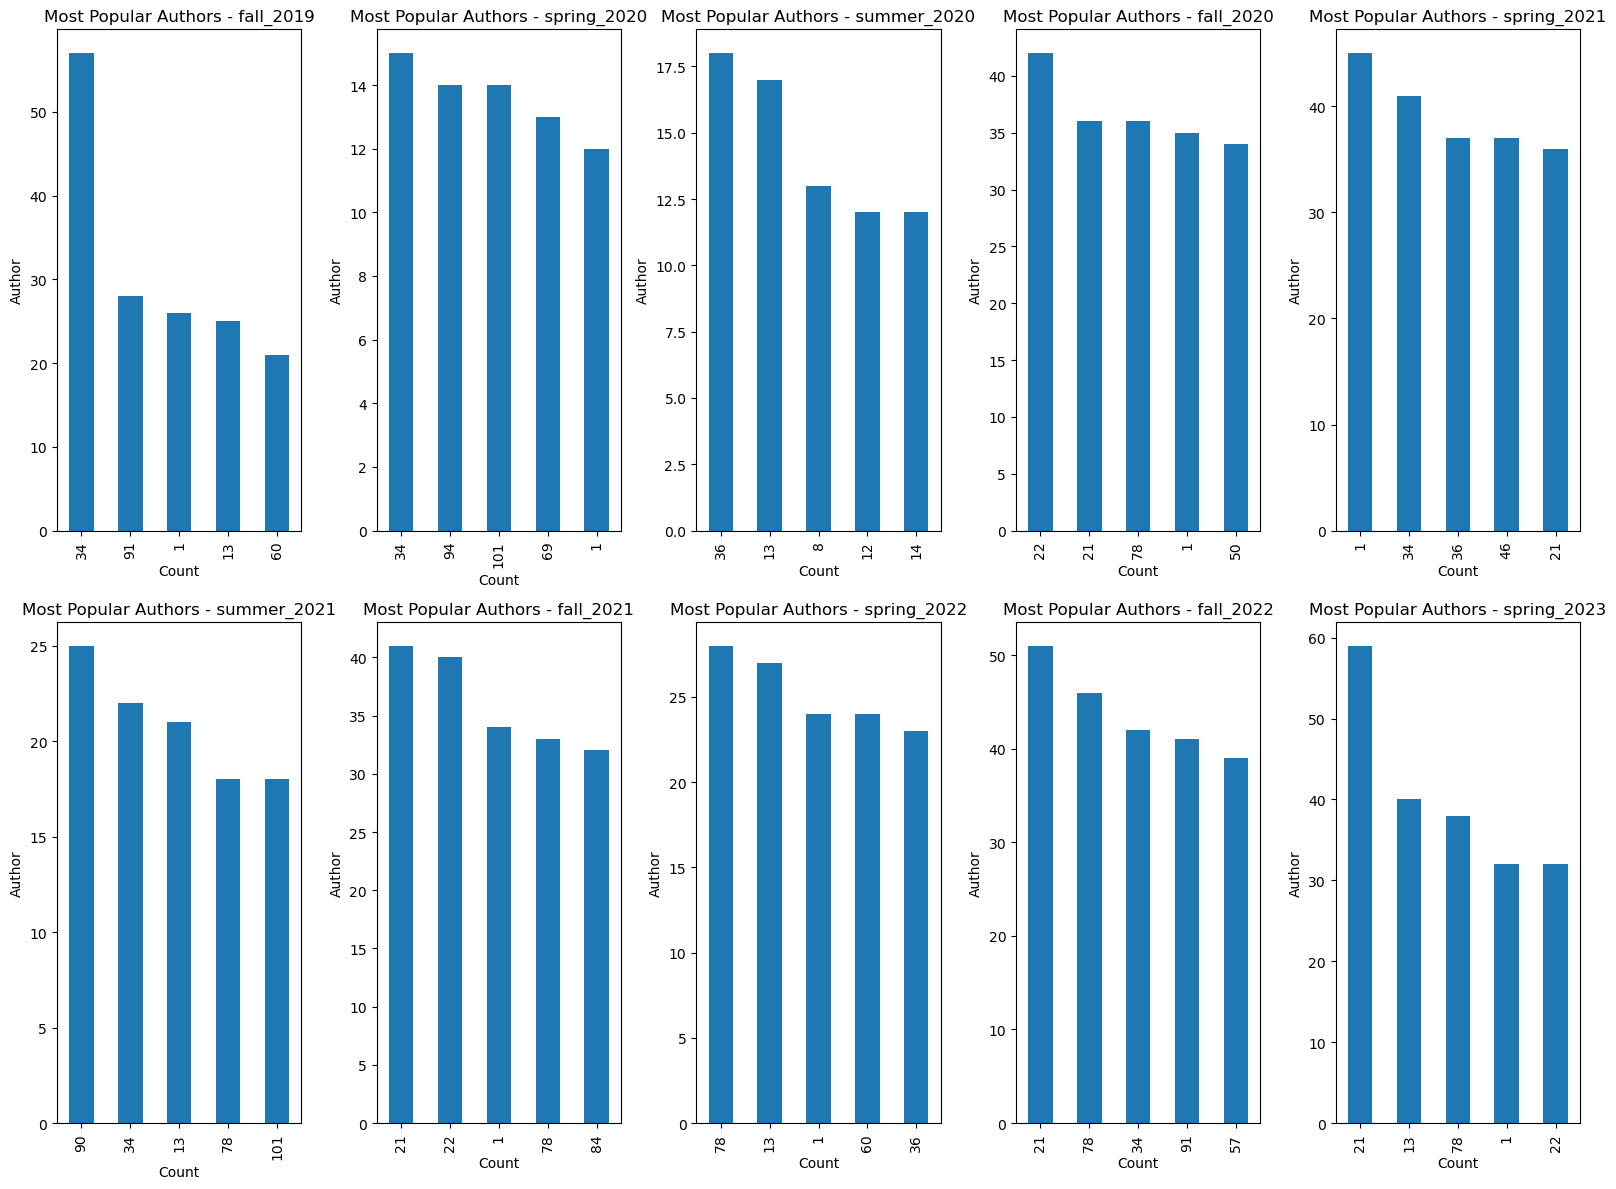

In [51]:
# Assuming your dataframe is named 'df_exploded'
grouped = df_exploded.groupby(['semester_year', 'author_mentions']).size()

# Get unique semester_years
#semester_years = grouped.index.get_level_values('semester_year').unique()

semester_year_order = ['fall_2019', 'spring_2020', 'summer_2020', 'fall_2020', 'spring_2021', 'summer_2021', 'fall_2021', 'spring_2022', 'fall_2022', 'spring_2023']

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 5

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))

# Iterate over each semester_year
for i, semester_year in enumerate(semester_year_order):
    # Select the top_five group for the current semester_year
    top_five = grouped.loc[semester_year].nlargest(5)
    
    # Calculate the subplot position
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Plot the bar chart in the corresponding subplot
    ax = axs[row_idx, col_idx]
    ax.set_title(f'Most Popular Authors - {semester_year}')
    top_five.plot(kind='bar', ax=ax)
    ax.set_xlabel('Count')
    ax.set_ylabel('Author')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


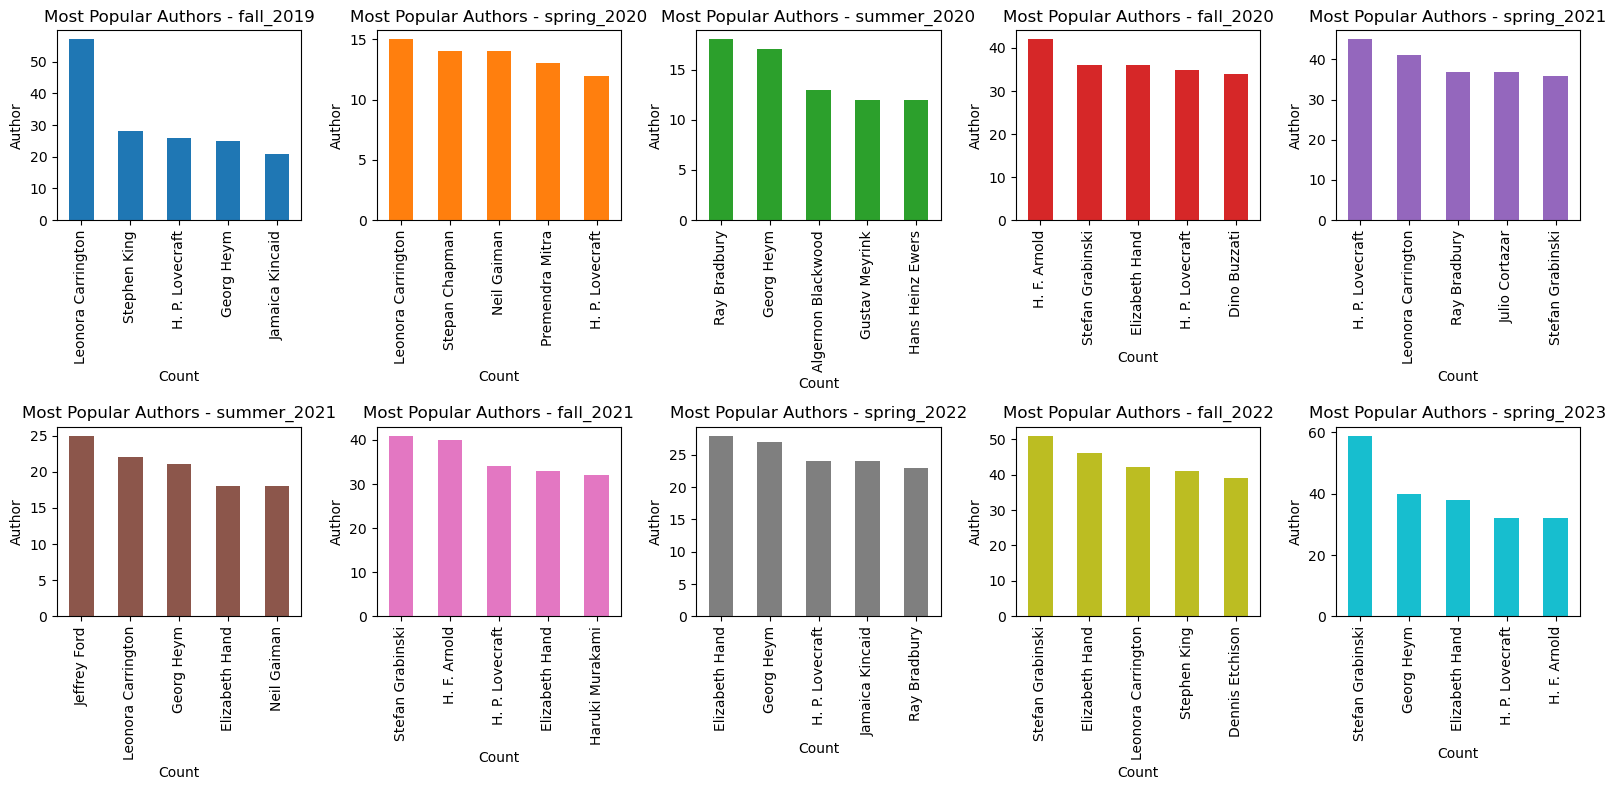

In [63]:
import json
# Assuming your dataframe is named 'df_exploded'
grouped = df_exploded.groupby(['semester_year', 'author_mentions']).size()

# Get unique semester_years
#semester_years = grouped.index.get_level_values('semester_year').unique()

# Reading in the author_list .json file:
with open(r'author_list\author_list.json') as file:
    author_names = json.load(file)

# Defining the specific ordering we'll use for each subplot
semester_year_order = ['fall_2019', 'spring_2020', 'summer_2020', 'fall_2020', 'spring_2021', 'summer_2021', 'fall_2021', 'spring_2022', 'fall_2022', 'spring_2023']

# Defining a colormap for our bars
colors = plt.cm.get_cmap('tab10')

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 5

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Iterate over each semester_year
for i, semester_year in enumerate(semester_year_order):
    # Select the top_five group for the current semester_year
    top_five = grouped.loc[semester_year].nlargest(5)
    
    # Calculate the subplot position
    row_idx = i // num_cols
    col_idx = i % num_cols

    ax = axs[row_idx, col_idx]
    ax.set_title(f'Most Popular Authors - {semester_year}')

    # Grab the color for the current subplot
    subplot_color = colors(i)
    bar_colors = [colors(j) for j in np.linspace(0, 1, len(top_five))]

    top_five_names = [next((d['name'] for d in author_names if d['id_number'] == author), None) for author in top_five.index]
    
    # Plot the bar chart in the corresponding subplot
    top_five.plot(kind='bar', ax=ax, color=subplot_color)
    ax.set_xticklabels(top_five_names)
    ax.set_xlabel('Count')
    ax.set_ylabel('Author')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [64]:
df_exploded.semester_year.unique()

spring_2020 = df_exploded[df_exploded['semester_year'] == 'spring_2020']
spring_2020.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
422,18861468,3889656,NaN,2020-01-27 20:24:17+00:00,Aamna Mamsa,<p>Hello everyone! Got registered to this clas...,3535536,NaN,1150006,spring_2020
423,18861294,3893422,NaN,2020-01-27 18:56:27+00:00,Hannah Swiatek,"<p>Hello everyone!</p>\n<p>My name is Hannah, ...",3535536,NaN,1150006,spring_2020
424,18839516,3878314,NaN,2020-01-20 04:25:21+00:00,Ellie Provo,Hi my name is Ellie Provo. I’m a junior&nbsp;b...,3535536,NaN,1150006,spring_2020
425,18828904,3881044,NaN,2020-01-17 02:10:54+00:00,Dechen Deng,"<p>Hi everyone,</p>\n<p>My name is Dechen Deng...",3535536,NaN,1150006,spring_2020
426,18828534,3895960,NaN,2020-01-17 00:54:28+00:00,Daniel Bahena-Murillo,"<p class=""p1""><span class=""s1"">Hi everyone, </...",3535536,NaN,1150006,spring_2020


In [65]:
spring_2020['author_mentions'].value_counts()

author_mentions
34          15
101         14
94          14
69          13
1           12
84          12
78          12
13          12
22          12
19017366    10
91           9
74           9
117          9
19038306     8
57           8
18895150     8
40           8
6            8
18932070     7
14           7
18966548     7
81           7
18879960     7
37           6
4            6
19076756     6
120          6
19017014     6
19011766     6
61           6
18966496     5
18844056     5
2            5
19071802     5
19071000     5
35           5
19017304     5
19017972     5
8            5
18917354     5
19008126     5
18852826     5
18984798     5
18963454     5
36           5
5            4
19104242     4
18971172     4
19045504     4
19053888     4
19038290     4
18921774     4
18831756     4
18852182     4
18823520     4
9            4
88           4
24           4
60           4
32           4
50           4
47           4
111          3
18855952     3
18948472     3
18949634 

In [66]:
spring_df_non_exploded = df[df['semester_year'] == 'spring_2020']

spring_df_non_exploded['author_mentions'].value_counts()

author_mentions
{}                                       34
{69}                                     10
{19038306}                                8
{19017366}                                8
{94}                                      7
{18966548}                                6
{19011766}                                6
{101}                                     6
{18932070}                                6
{18895150}                                6
{18879960}                                6
{18963454}                                5
{19076756}                                5
{34}                                      5
{6}                                       5
{117}                                     5
{18917354}                                5
{19071802}                                5
{18844056}                                5
{19017014}                                5
{19071000}                                4
{18852826}                                4
{19053888}      